In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_csv("emails.csv")

# Display first 5 rows
print(df.head())

# Check basic info
print(df.info())


  Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  jay  \
0   Email 1    0   0    1    0    0   0    2    0    0  ...         0    0   
1   Email 2    8  13   24    6    6   2  102    1   27  ...         0    0   
2   Email 3    0   0    1    0    0   0    8    0    0  ...         0    0   
3   Email 4    0   5   22    0    5   1   51    2   10  ...         0    0   
4   Email 5    7   6   17    1    5   2   57    0    9  ...         0    0   

   valued  lay  infrastructure  military  allowing  ff  dry  Prediction  
0       0    0               0         0         0   0    0           0  
1       0    0               0         0         0   1    0           0  
2       0    0               0         0         0   0    0           0  
3       0    0               0         0         0   0    0           0  
4       0    0               0         0         0   1    0           0  

[5 rows x 3002 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries

In [3]:
df.drop(columns=['Email No.'], inplace=True)

In [4]:
X = df.drop(columns=['Prediction'])
y = df['Prediction']

# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

In [7]:
print("\n--- KNN Performance ---")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


--- KNN Performance ---
Accuracy: 0.8454106280193237
              precision    recall  f1-score   support

           0       0.98      0.80      0.88       739
           1       0.66      0.95      0.78       296

    accuracy                           0.85      1035
   macro avg       0.82      0.88      0.83      1035
weighted avg       0.89      0.85      0.85      1035



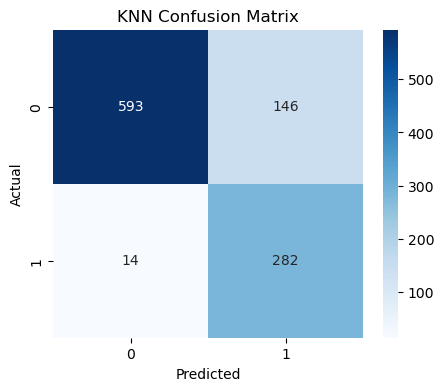

In [8]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [9]:
svm = SVC(kernel='linear', C=1)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

In [10]:
print("\n--- SVM Performance ---")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


--- SVM Performance ---
Accuracy: 0.9468599033816425
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       739
           1       0.90      0.92      0.91       296

    accuracy                           0.95      1035
   macro avg       0.93      0.94      0.94      1035
weighted avg       0.95      0.95      0.95      1035



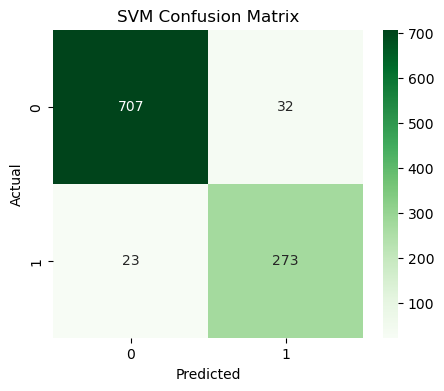

In [11]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Greens')
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

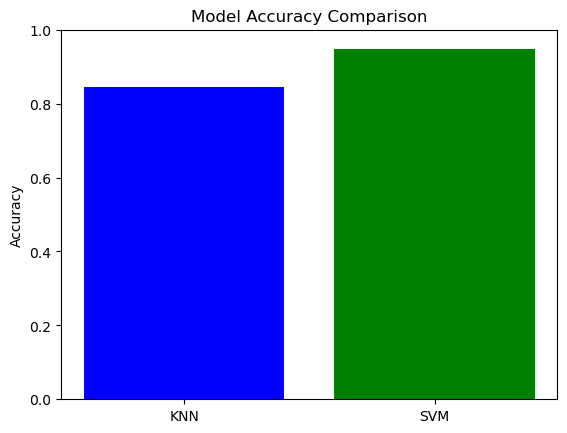

  Model  Accuracy
0   KNN  0.845411
1   SVM  0.946860


In [12]:
acc_knn = accuracy_score(y_test, y_pred_knn)
acc_svm = accuracy_score(y_test, y_pred_svm)

models = pd.DataFrame({
    'Model': ['KNN', 'SVM'],
    'Accuracy': [acc_knn, acc_svm]
})

plt.bar(models['Model'], models['Accuracy'], color=['blue', 'green'])
plt.title('Model Accuracy Comparison')
plt.ylim(0,1)
plt.ylabel('Accuracy')
plt.show()

print(models)